# The basics of notebooks

This notebook has been developed to introduce programming using the pyspark framework. 

Things this section covers:
- Creating a dataframe from scratch
- Visualising using the Gui 
- Working with magic commands 
- bonus features of synapse notebooks AND fabric notebooks
- challenge 

In [2]:
# Welcome to your new notebook, lets start with the basics in python
# Type here in the cell editor to add code!

print("hello world")

def sum(num1:int,num2: int):
    """
    PARAM: NUM1 - only allows integers
    PARAM: NUM2 - only allows integers
    This is a function that adds two whole numbers together and returns the sum
    """
    return num1 + num2

print(sum(1,2))

# lets put this function in a variable
thesumisThree = sum(1,2)

print(f"This is a fancy string that allows me to combine:\nvariables:{thesumisThree},\nstring text: hello world!")

hello world
3
This is a fancy string that allows me to combine:
variables:3,
string text: hello world!


#Working with python 
Pandas is usually the go to tool for python programmers who work with smallish datasets. The library is very fleshed out and works with a lot of other popular libraries such as matplotlib, seaborn, pyspark, sklearn, etc. 

Lets build a typical pandas dataframe. 

In [10]:
# in python, we can use pandas to create a dataframe
import pandas as pd

data = {
    'id': [1, 2, 3, 4, 5, 6, 7],
    'dinosaur_name': ['sparkosaurus', 'databrickosaurus', 'sparkosaurus', 'synaposaur', 'doYouThinkHeSaurus', 'fabricodon', 'fabricodon'],
    'numberOfServersDestroyed': [10, 20, 30, 40, 50, 60, 70]
}

# Create the DataFrame
pandas_df = pd.DataFrame(data)


StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 12, Finished, Available)

BUT 

Pandas is also designed to be useful for small data. So when you run out of memory, you have to take more carefully crafted approach and this is where large tech companies with their datacenters filled with compute come into play. This is also where libraries such as pyspark, vaex and dasks comes into play. Pyspark has been identified as the tool for large data because it distributes the data across machines allowing the machines to work in parallel. Pyspark is also integrated across the various data related services Microsoft offers (databricks, Synapse and of course Fabric).

Lets recreate the pandas dataframe in spark.

Note: in the text below, we don't have to import or specify a spark session or context. This is already preconfigured into the notebook when you run it but if you want to use functions like the pyspark.sql class, then you will have to specify it. 

In [27]:
from pyspark.sql.types import *

# Define the schema 
schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("dinosaur_name", StringType(), True),
    StructField("numberOfServersDestroyed", IntegerType(), True)
])

# Define the data
data = [(1, 'sparkosaurus', 10),
        (2, 'databrickosaurus', 20),
        (3, 'sparkosaurus', 30),
        (4, 'synaposaur', 40),
        (5, 'doYouThinkHeSaurus', 50),
        (6, 'fabricodon', 60),
        (7, 'fabricodon', 70)]

# Create the DataFrame
df = spark.createDataFrame(data, schema)

df

# if you want to be sneaky you can also convert the pandas dataframe to spark. Sometimes, when there are no library options available in spark and pandas, some data scientists will convert the spark dataframe to pandas, do their work, and then convert it back to spark. This is not recommended for large datasets, but it is a good option for small datasets.
# uncomment the text below
#pandas_to_spark_df = spark.createDataFrame(df_pandas)
#pandas_to_spark_df.display()


StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 29, Finished, Available)

DataFrame[id: int, dinosaur_name: string, numberOfServersDestroyed: int]

Hang on, I wrote df, but this time, it didn't visualise the dataframe!? Spark has an inbuilt planner which is goal optimised to reduce the amount of memory because of course, imagine you tried to show a dataframe with 4 petabytes worth of data. It's pretty clever that way. You should also identify that because there's a lot of components happening in the framework, it takes much longer than running a pandas notebook. However, lets show you the different ways you can visualise the data.

In [5]:
# print to console
df.show()

StatementMeta(, 36cac2d5-82e2-4f8d-b03d-a7b282d52bb1, 7, Finished, Available)

+---+------------------+------------------------+
| id|     dinosaur_name|numberOfServersDestroyed|
+---+------------------+------------------------+
|  1|      sparkosaurus|                      10|
|  2|  databrickosaurus|                      20|
|  3|      sparkosaurus|                      30|
|  4|        synaposaur|                      40|
|  5|doYouThinkHeSaurus|                      50|
|  6|        fabricodon|                      60|
|  7|        fabricodon|                      70|
+---+------------------+------------------------+



In [ ]:
In the cell below, you can play around with the table and sort the index/ id/ column and number. You also can build charts using the chart tool! Click around and experiment :) 

In [7]:
#print as interactive HTML

display(df)

StatementMeta(, 36cac2d5-82e2-4f8d-b03d-a7b282d52bb1, 9, Finished, Available)

SynapseWidget(Synapse.DataFrame, 3925a289-8cbb-4556-a5ed-9915329cb3bb)

I can also build charts in pyspark using plotly or the inbuilt functions in pandas


StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 17, Finished, Available)

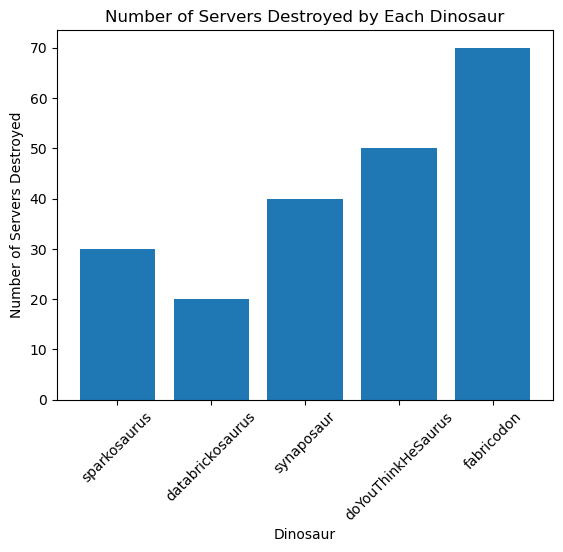

In [15]:

plt.bar(pandas_df['dinosaur_name'], pandas_df['numberOfServersDestroyed'])

# Add labels and title
plt.xlabel('Dinosaur')
plt.xticks(rotation=45)

plt.ylabel('Number of Servers Destroyed')
plt.title('Number of Servers Destroyed by Each Dinosaur')

# Show the plot
plt.show()

Lets create a template plot using matplot lib. I took this using the 'snippet' function embedded into fabric/synapse and then personalised a function to make it a little more fun for you to run. You can choose a favourite colour to change the colour of the bar chart below or just leave it blank.

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 11, Finished, Available)

You either didn't fill in the variable or it doesn't exist so it's no longer your favourite colour. Your new favourite colour is:papayawhip. Hope you like it!


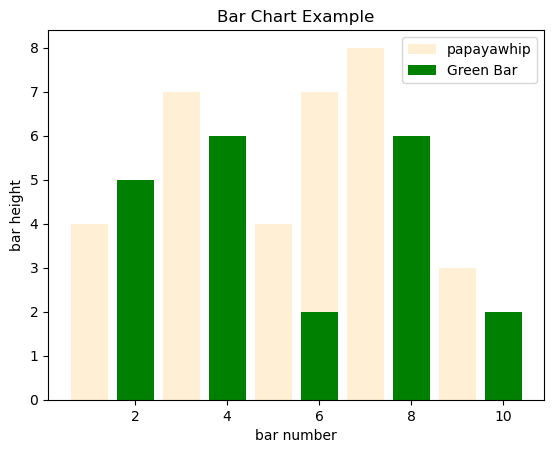

In [9]:

# fill in the following cell: What's your favourite colour??
favourite_colour = "" #INPUT



import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random


def chooseFavouriteColour(favourite_colour):
    colours = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

    if favourite_colour in colours.keys():
        return(favourite_colour)

    else:
        random_colour = random.choice(list(colours.keys()))
        print(f"You either didn't fill in the variable or it doesn't exist so it's no longer your favourite colour. Your new favourite colour is:{random_colour}. Hope you like it!")
        return random_colour



# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

colour_selector = chooseFavouriteColour(favourite_colour)

plt.bar(x1, y1, label=colour_selector, color=colour_selector)
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

Pretty cool stuff so far, don't you think? 

Lets look at some features regarding the spark api. What if a colleague only knew SQL but you know pyspark? What do you do then?! Thankfully, spark has built in APIs to communicate with each other. Initially spark was built from scala which is more efficient to run than the other APIs but python, SQL and R are popular data analyst tools so to make it more accessible, the languages can interact with each other. Take a look at the code below.

In [19]:

# using the spark df here to convert it into a SQL table. This is only active while the cluster is running. If you restart the cluster, you will have to run this cell again.
df.createOrReplaceTempView("dino_df_to_table")

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 21, Finished, Available)

In [20]:
%%sql
-- I use a magic command to tell this notebook that I want to use SQL.
-- Note:  The magic command is the same as synapse. Databricks only uses on %

SELECT * FROM dino_df_to_table
WHERE numberOfServersDestroyed > 30

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 22, Finished, Available)

<Spark SQL result set with 4 rows and 3 fields>

In [ ]:
#type "snippet in this cell below to explore some sample python data"

Lets write our dataframe into the Files section of our Onelake as a delta format. Refresh the files section on your lakehouse explorer once you run the cell below.


In [33]:

from delta.tables import *
from pyspark.sql.functions import * 
import datetime as dt
today=dt.datetime.today().strftime('%Y%m%d')


deltaTable_path = f"Files/spark_showcase_delta/dinosaurMayhem/{today}"

#I do this to write to a folder my data lake
df.write.mode("overwrite").format("delta").save(deltaTable_path)

# Now refresh your files! You should see that in your datalake



StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 35, Finished, Available)

What about a managed identity? (This is where I can look in my tables section within the lakehouse explorer). Once again, refresh anything on the left hand side once you run the cell below. 

A managed identity means that if I wrote  
```
SELECT * FROM <YOURONELAKE>.DinosaurRampage
```

It would know exactly what I'm referring to which is pretty useful if I'm using that dataset a lot. 


In [34]:

df.write.mode("overwrite").format("delta").saveAsTable("DinosaurRampage")
spark.sql("DESCRIBE EXTENDED DinosaurRampage").show(truncate=False)


StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 36, Finished, Available)

+----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                                                |comment|
+----------------------------+-----------------------------------------------------------------------------------------------------------------------------------------+-------+
|id                          |int                                                                                                                                      |       |
|dinosaur_name               |string                                                                                                                                   |       |
|numberOfServersDestroyed    |int                                                                                  

And some of the features inside of delta makes it very useful for governance. For instance, if you're in a company that has a lot of updating table variables and want to use a specific variant for auditing purposes, you can! Below, we decide to attach the power of compute to our fabricodons and suddenly, we find they are 10 times more effective at destroying the servers!

In [36]:
from delta.tables import *
from pyspark.sql.functions import *

# Create a deltaTable object
deltaTable = DeltaTable.forPath(spark, deltaTable_path)

# ah the fabricodons are out of control!!!
deltaTable.update(
     condition = "dinosaur_name LIKE 'fabric%'",
     set = { "numberOfServersDestroyed": "numberOfServersDestroyed * 10" })

 # View the updated data as a dataframe
deltaTable.toDF().show(10)

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 38, Finished, Available)

+---+------------------+------------------------+
| id|     dinosaur_name|numberOfServersDestroyed|
+---+------------------+------------------------+
|  1|      sparkosaurus|                      10|
|  2|  databrickosaurus|                      20|
|  3|      sparkosaurus|                      30|
|  4|        synaposaur|                      40|
|  5|doYouThinkHeSaurus|                      50|
|  6|        fabricodon|                     600|
|  7|        fabricodon|                     700|
+---+------------------+------------------------+



And now, lets remind ourselves what fabricodon was before we introduced the power of compute to it. 

In [38]:

# Remember how we altered the fabricodon?
new_df = (
    spark
    .read
    .format("delta")
    .option("versionAsOf", 0) # you can change this value :)
    .load(deltaTable_path)
)

new_df.show()

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 40, Finished, Available)

+---+------------------+------------------------+
| id|     dinosaur_name|numberOfServersDestroyed|
+---+------------------+------------------------+
|  1|      sparkosaurus|                      10|
|  2|  databrickosaurus|                      20|
|  3|      sparkosaurus|                      30|
|  4|        synaposaur|                      40|
|  5|doYouThinkHeSaurus|                      50|
|  6|        fabricodon|                      60|
|  7|        fabricodon|                      70|
+---+------------------+------------------------+



# Challenge: Now it's your turn to experiment and try it out 
If you have a table already set up you can enter them in the following cell below and continue your analysis too. If you haven't run the 00-Setup.ipynb notebook. Now's the time to return to it and get it ready!

In [24]:
one_datalake=""# insert datalake name here 
table_name ="" #insert table name here

df_from_datalake = spark.sql(f"SELECT * FROM {one_datalake}.{table_name}")

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 26, Finished, Available)

In [37]:
from pyspark.sql import functions as F

#Lets filter a column. You're going to have to look at your data and decide here.

column_name = ""# choose a column that you want to filter by e.g. year
filter_by ="" # choose a variable in that column you want to filter by e.g. 2020


df_clean = (
    df_from_datalake
    .filter(F.col(column_name) == filter_by)
    )

#congratulations! You just did your very first transformation in fabric. Lets write this back into our one lake as a parquet file
# Also hard mode: can you add the the .agg function (chat gpt can help you here) to get the mean of the column you filtered by?

display(df_clean)

StatementMeta(, 5e38eacb-a0db-439e-b813-71f5fd24a802, 39, Finished, Available)

SynapseWidget(Synapse.DataFrame, 609ff5cf-3ef7-4477-b844-8df61cb9fd1a)

Congratulations! You just did your very first transformation in fabric. Lets write this back into our one lake as a parquet file


# Challenge 2: Can you write the cleaned dataframe as a parquet in your One lake Files? 

Notebook has been created by Victoria Eshelby to support Wesley Bolster